In [60]:
import nltk
# packages

# standard
import numpy as np
import pandas as pd
import time 
import re
from bs4 import BeautifulSoup

# plots
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string functions
import string
from collections import Counter


# NLTK
import nltk
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_excel('./Depression_Text.xlsx')
df.head(10)

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age
5,"There are people who died, their friends didn'...",0.0,16.0,Male,Teen Age
6,keep it up hahaha,0.0,16.0,Male,Teen Age
7,The match cycle I had.Buy-brought-out-lost.,0.0,16.0,Male,Teen Age
8,"nctb! jewel case dream, which doesn't have a p...",0.0,16.0,Male,Teen Age
9,"college but it's like not going to college, bu...",0.0,16.0,Male,Teen Age


In [3]:
df.columns

Index(['text', 'label', 'Age', 'Gender', 'Age Category'], dtype='object')

In [4]:
print("Cantidad de datos y columnas del dataset:")
df.shape

Cantidad de datos y columnas del dataset:


(7489, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7476 non-null   object 
 1   label         7486 non-null   float64
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
dtypes: float64(2), object(3)
memory usage: 292.7+ KB


In [6]:
print("Informacion de las variables numericas del dataset (label y age)")
df.describe()

Informacion de las variables numericas del dataset (label y age)


,label,Age
count,7486.000000,7486.000000
mean,0.163906,15.379108
std,0.370215,1.058104
min,0.000000,13.000000
25%,0.000000,14.000000
50%,0.000000,15.000000
75%,0.000000,16.000000
max,1.000000,17.000000


In [7]:
print("Informacion de todas las variables incluyendo las no numericas")
df.describe(include=object)

Informacion de todas las variables incluyendo las no numericas


,text,Gender,Age Category
count,7476,7486,7486
unique,7370,2,2
top,ni-ki best boy,Male,Young Age
freq,11,4062,3974


In [8]:
df.isna().sum().to_frame()

,0
text,13
label,3
Age,3
Gender,3
Age Category,3


#### Hay datos nulos en el dataset, como son pocos se procede a eliminar las filas que los tienen


In [9]:
df.dropna(axis=0, inplace=True)
df.isna().sum().to_frame()

,0
text,0
label,0
Age,0
Gender,0
Age Category,0


In [10]:
df['label'].value_counts()

label
0.0    6252
1.0    1224
Name: count, dtype: int64

# Visualizacion de los datos

Text(-2.1805555555555554, 0.5, 'Frecuencia')

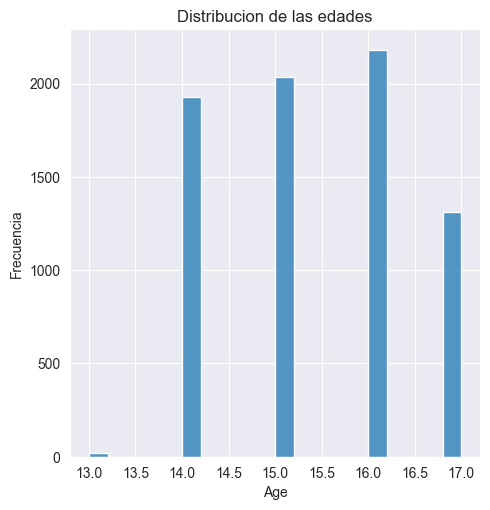

In [11]:
sns.displot(df['Age'].dropna())
plt.title('Distribucion de las edades')
plt.ylabel('Frecuencia')

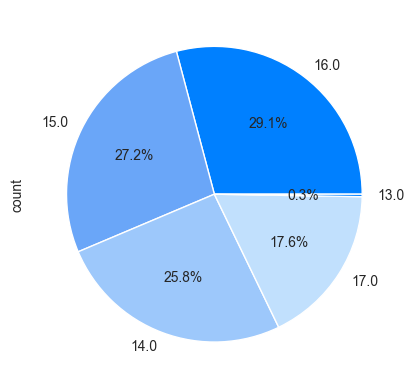

In [12]:
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#0080ff','#6aa6f8','#9dc8fb','#c1e0fd'])
plt.show()

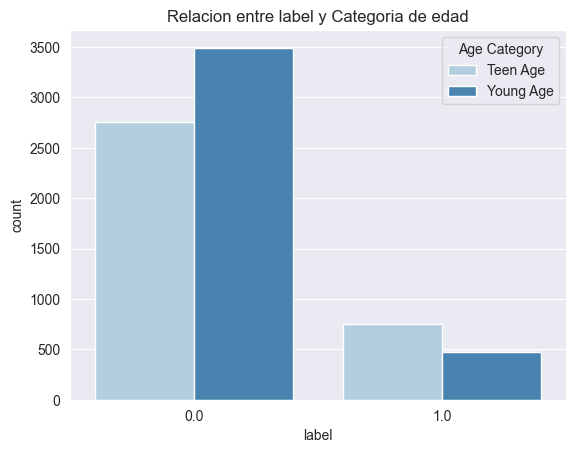

In [13]:
sns.countplot(x='label', hue='Age Category', data=df, palette='Blues')
plt.title('Relacion entre label y Categoria de edad')
plt.show()

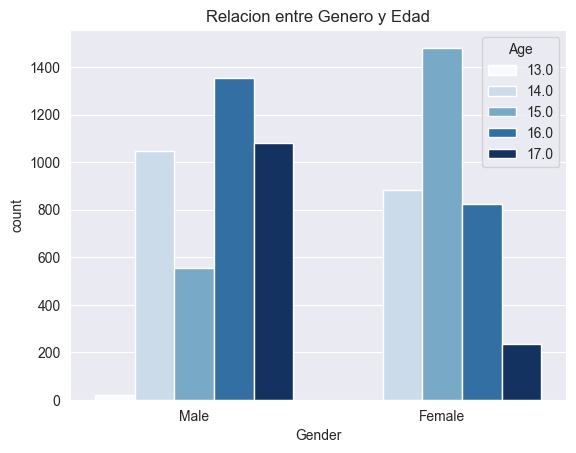

In [14]:
sns.countplot(x='Gender', hue='Age', data=df, palette='Blues')
plt.title('Relacion entre Genero y Edad')
plt.show()

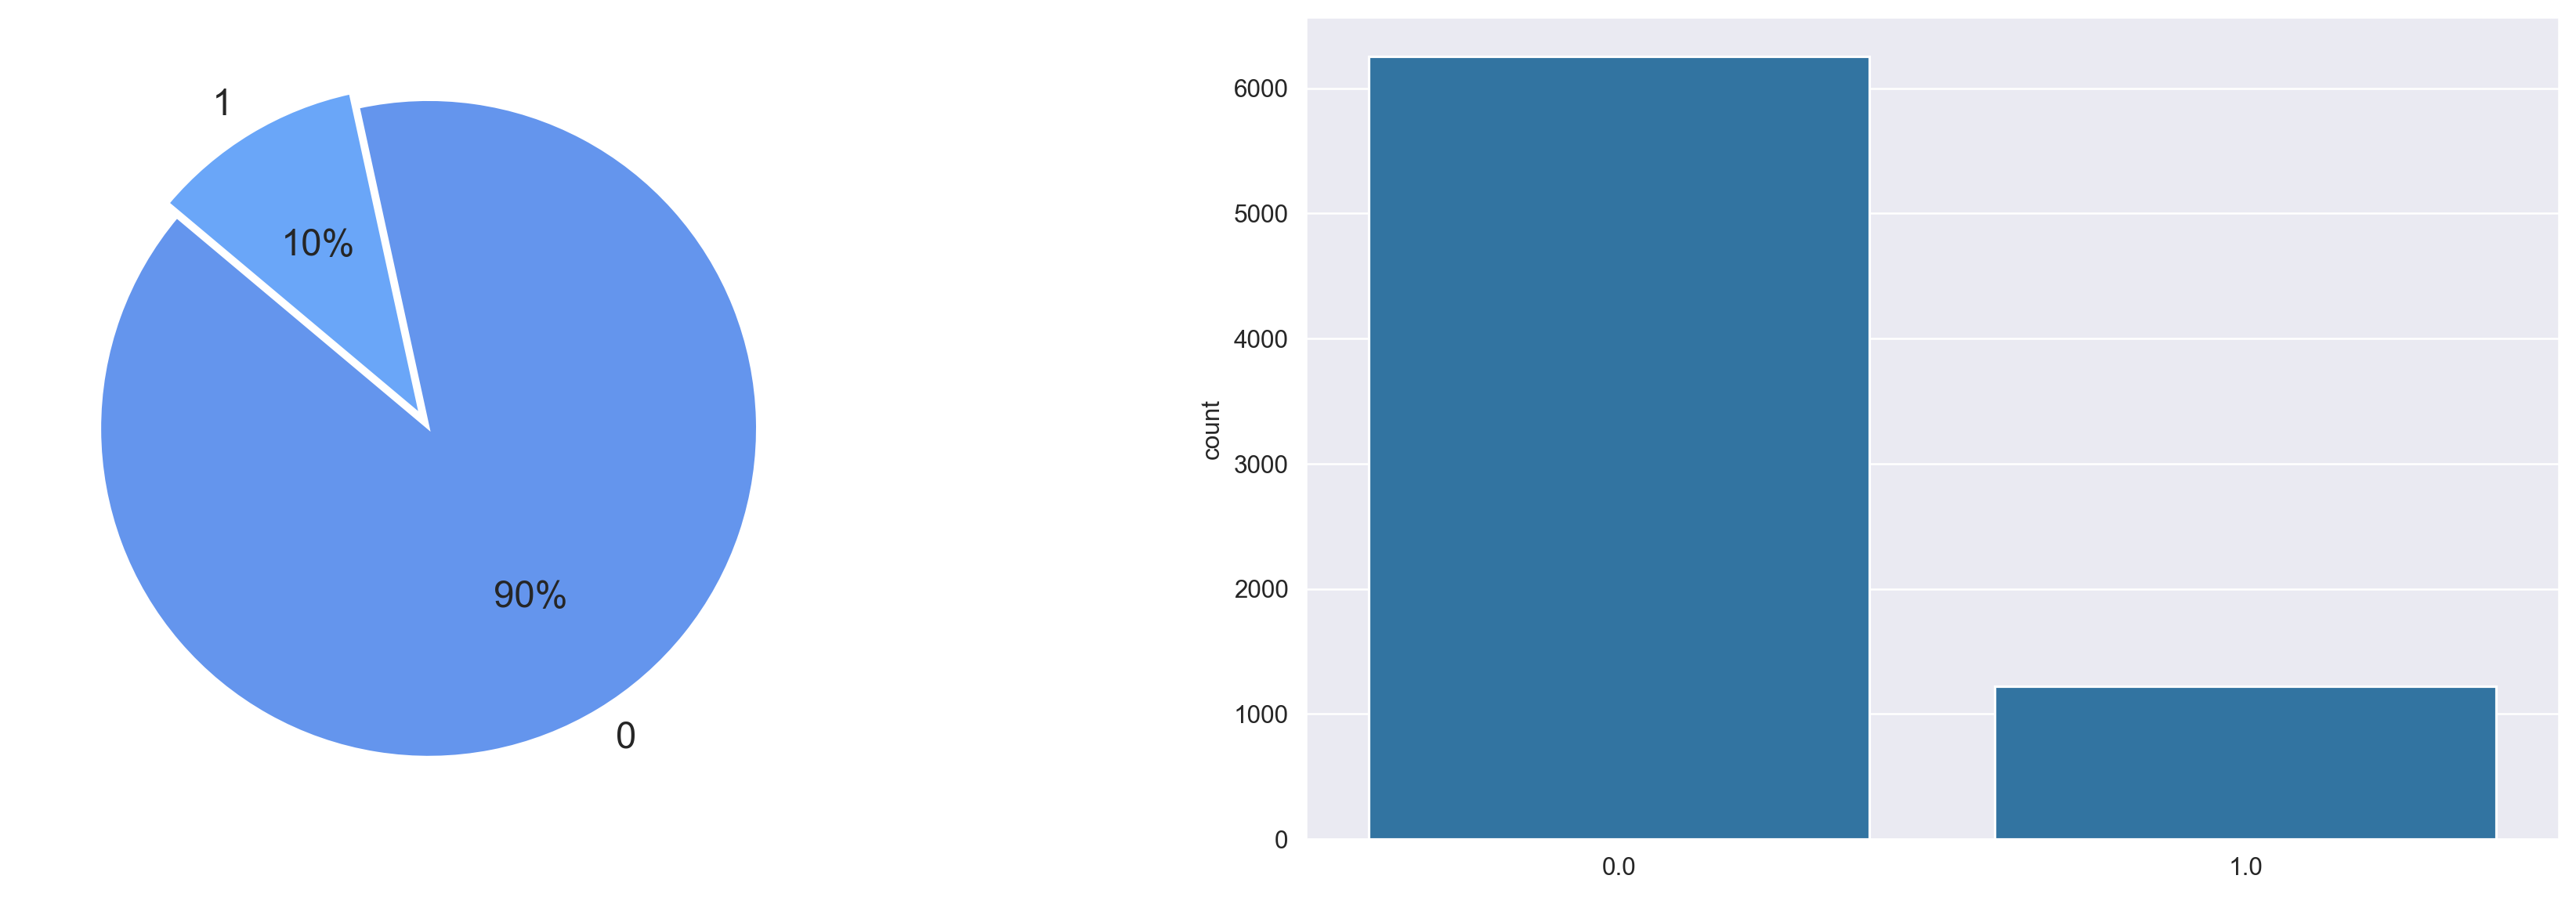

In [15]:
labels = [0, 1]
sizes = [6240, 730]
custom_colours = ['#6495ED', '#6AA6F8']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts())

plt.show()

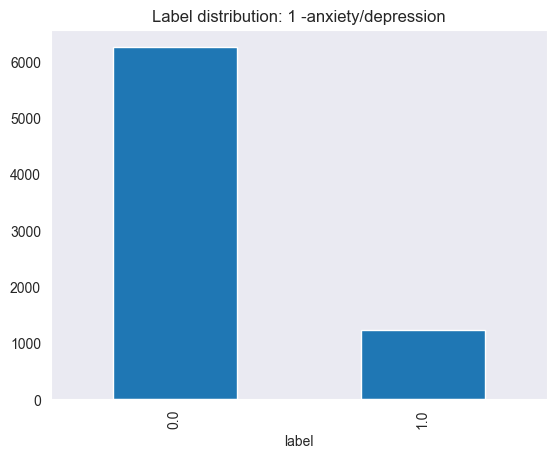

In [16]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [17]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/var/folders/3w/g2q8d5957z31f27pry297wcr0000gn/T/ipykernel_71290/3196197132.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/3w/g2q8d5957z31f27pry297wcr0000gn/T/ipykernel_71290/3196197132.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/3w/g2q8d5957z31f27pry297wcr0000gn/T/ipykernel_71290/3196197132.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [18]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [30]:
def text_cleaner(text):
    new_string = text.lower()
    new_string = BeautifulSoup(new_string, "lxml").text
    new_string = re.sub(r'\([^)]*\)', '', new_string)
    new_string = re.sub('"','', new_string)
    new_string = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_string.split(" ")])    
    new_string = re.sub(r"'s\b","",new_string)
    new_string = re.sub("[^a-zA-Z]", " ", new_string) 
    new_string = re.sub('[m]{2,}', 'mm', new_string)
    return new_string

In [32]:
df['cleaned'] = df["text"].apply(text_cleaner)

/var/folders/3w/g2q8d5957z31f27pry297wcr0000gn/T/ipykernel_71290/1299488159.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  new_string = BeautifulSoup(new_string, "lxml").text


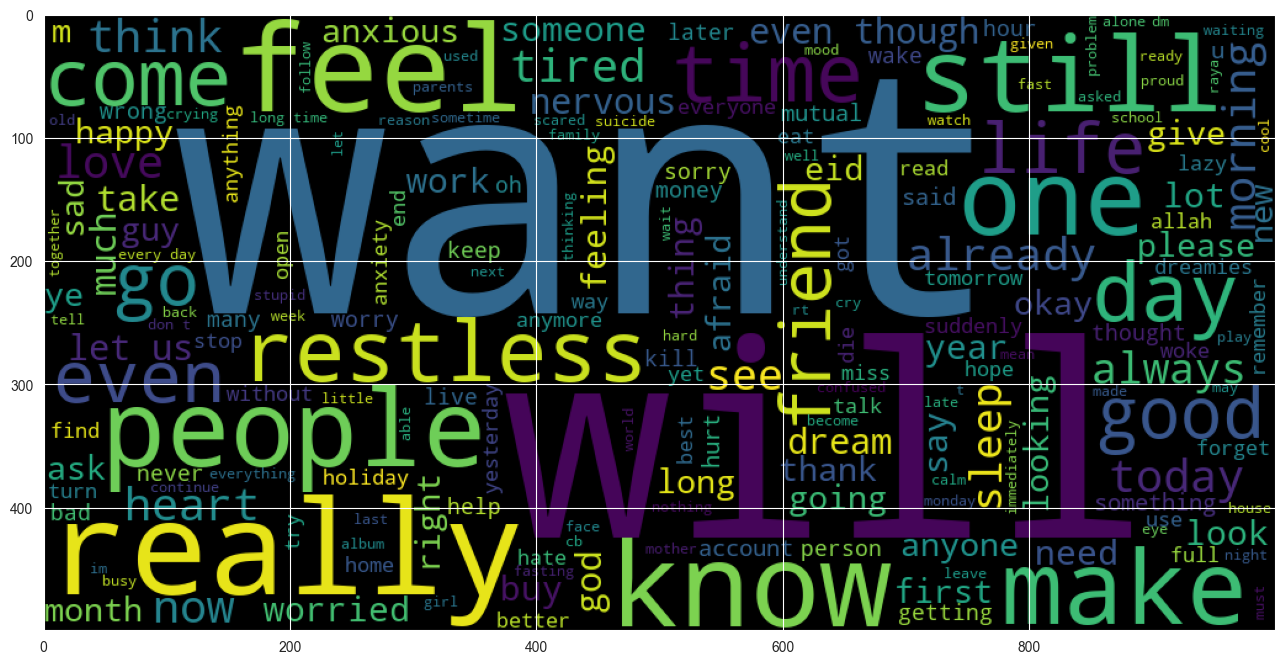

In [34]:
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [35]:
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])

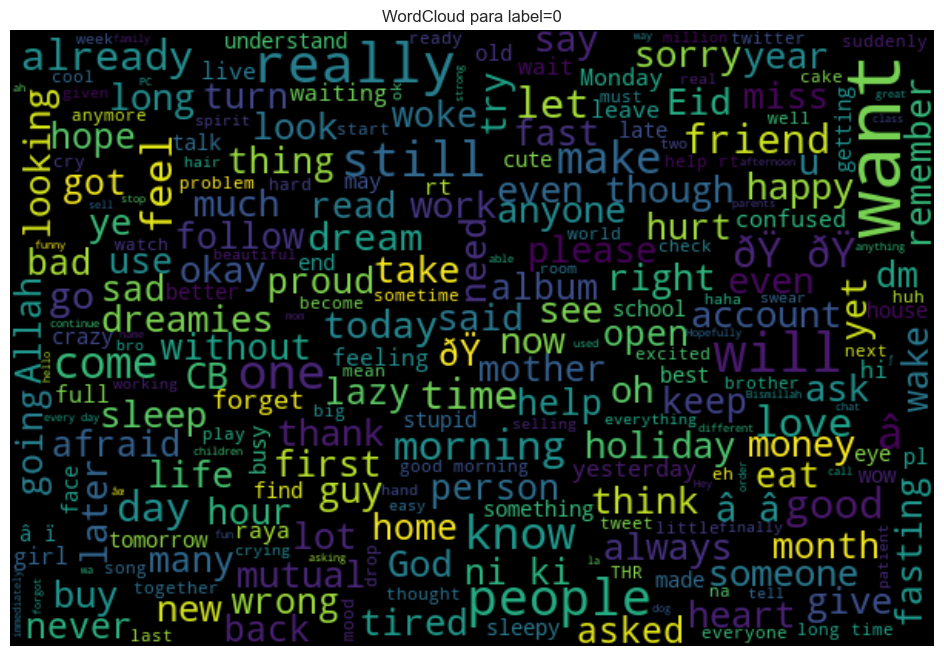

In [36]:
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud para label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

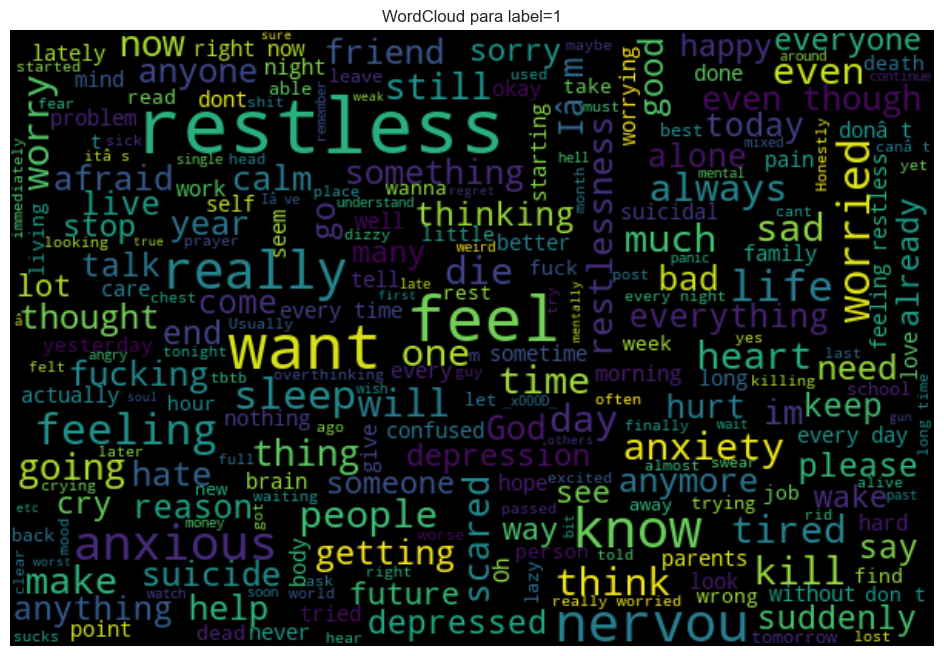

In [37]:
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud para label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

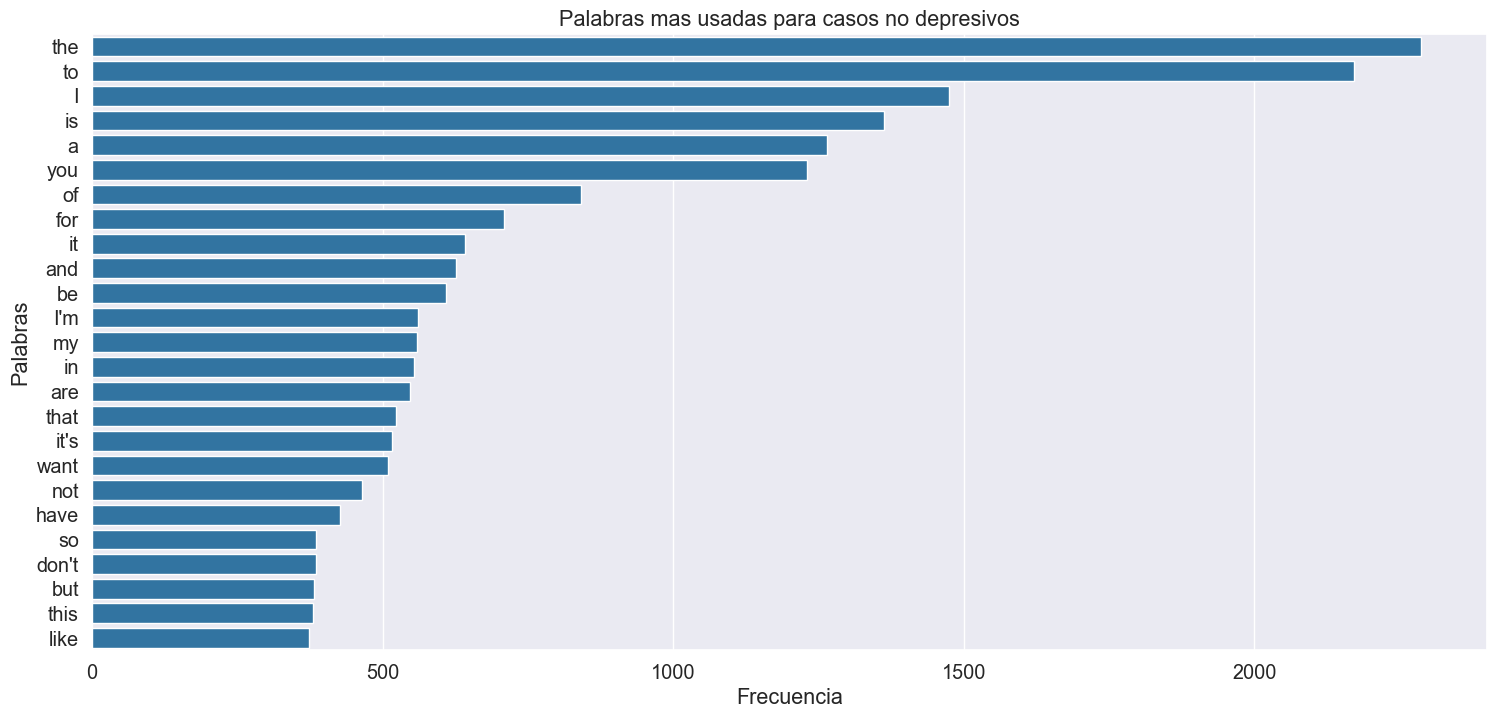

In [39]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'])
plt.title("Palabras mas usadas para casos no depresivos")
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.show()

# Creando los modelos

In [40]:
X = df.cleaned
y = df.label

In [43]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [44]:
X_cv =vect.fit_transform(X).toarray()

In [46]:
X_cv.shape

(7476, 20000)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [49]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

## Regresion logistica

Accuracy : 0.9565508021390374

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1251
         1.0       0.94      0.78      0.86       245

    accuracy                           0.96      1496
   macro avg       0.95      0.89      0.91      1496
weighted avg       0.96      0.96      0.95      1496

   ------------ Confusion Matrix -------------- 


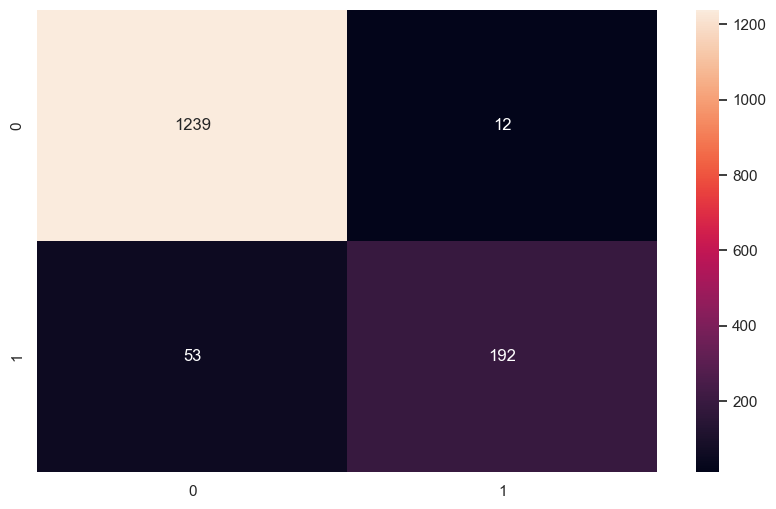

In [53]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

## Arbol de Decision

Accuracy : 0.9398395721925134

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1251
         1.0       0.82      0.81      0.82       245

    accuracy                           0.94      1496
   macro avg       0.89      0.89      0.89      1496
weighted avg       0.94      0.94      0.94      1496

   ------------ Confusion Matrix -------------- 


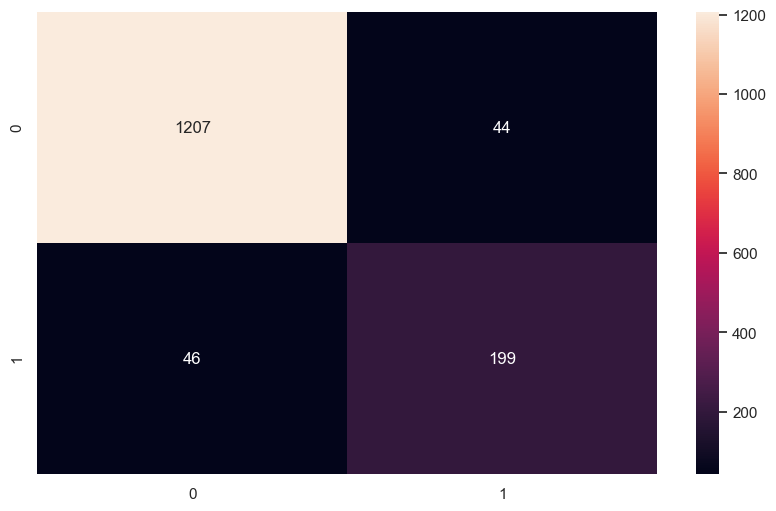

In [56]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

## Support Vector Machine (SVM)

Accuracy : 0.9097593582887701

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1251
         1.0       0.97      0.46      0.63       245

    accuracy                           0.91      1496
   macro avg       0.94      0.73      0.79      1496
weighted avg       0.92      0.91      0.90      1496

   ------------ Confusion Matrix -------------- 


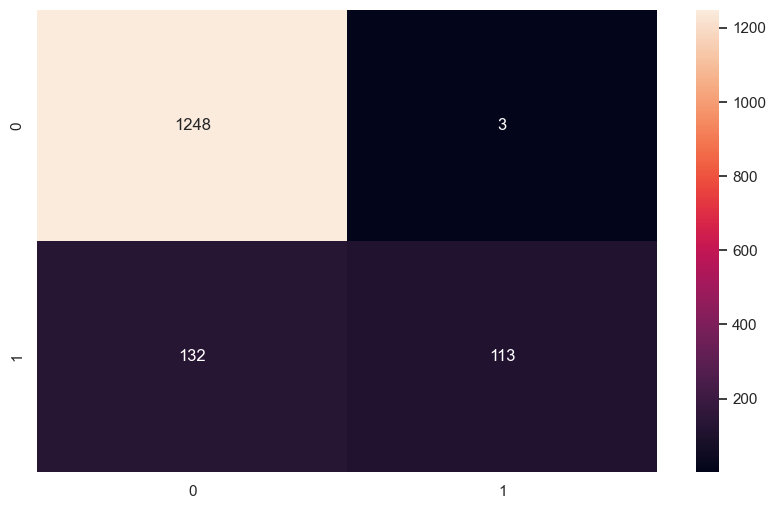

In [57]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

## KNN

Accuracy : 0.8636363636363636

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      1251
         1.0       0.92      0.18      0.31       245

    accuracy                           0.86      1496
   macro avg       0.89      0.59      0.62      1496
weighted avg       0.87      0.86      0.82      1496

   ------------ Confusion Matrix -------------- 


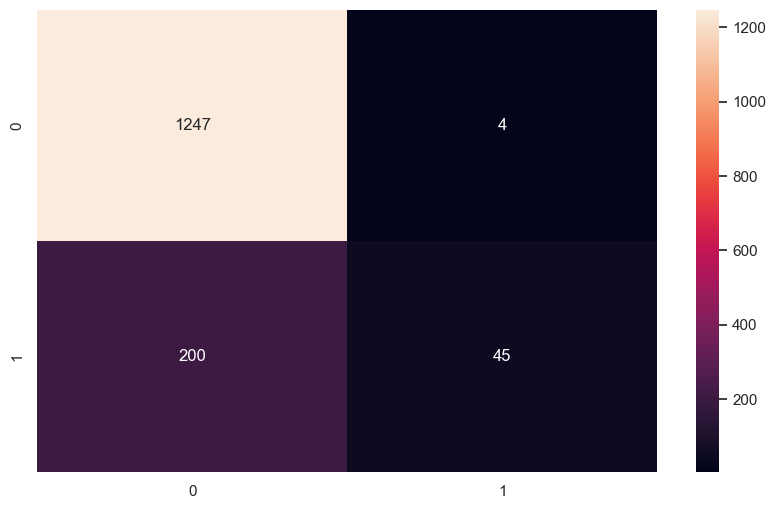

In [59]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

## Random Forest

Accuracy : 0.9505347593582888

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1251
         1.0       0.95      0.74      0.83       245

    accuracy                           0.95      1496
   macro avg       0.95      0.87      0.90      1496
weighted avg       0.95      0.95      0.95      1496

   ------------ Confusion Matrix -------------- 


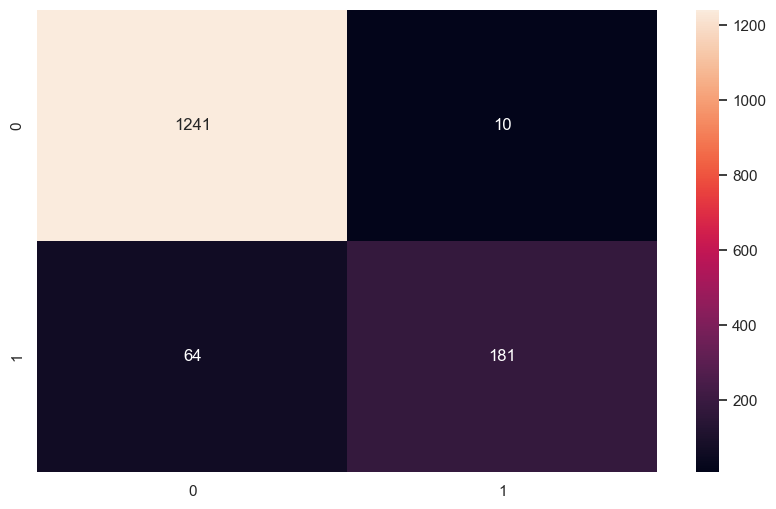

In [58]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Accuracy : 0.9431818181818182

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1251
         1.0       0.98      0.67      0.79       245

    accuracy                           0.94      1496
   macro avg       0.96      0.83      0.88      1496
weighted avg       0.95      0.94      0.94      1496

   ------------ Confusion Matrix -------------- 


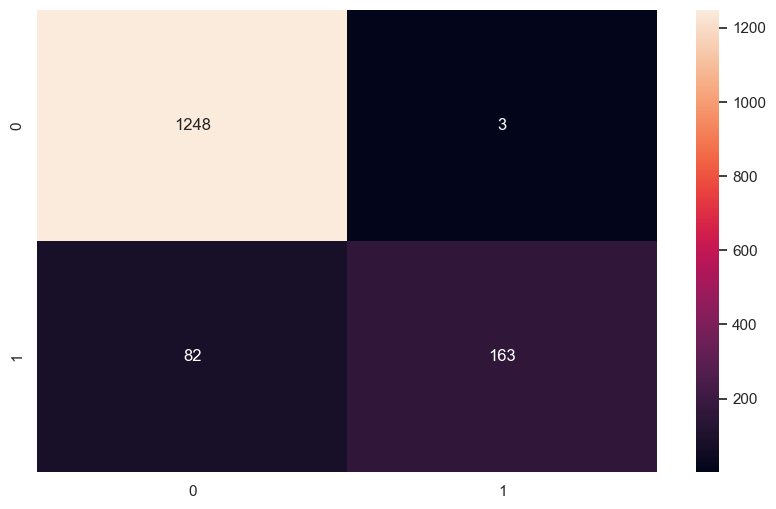

In [61]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),                                        
                                          ('KNN',clf_knn),                                    
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [64]:
lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
model_names = ['Logistic Regression','Decision Tree', 'Random Forest', 'SVM', 'KNN']
ml_models = [lr_model, dt_model, rf_model, svm_model, knn_model]

In [65]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [68]:
print(performance_matrix)

                     Precision  Recall  F1 Score
Logistic Regression      96.61   96.66     96.62
Decision Tree            92.30   92.18     92.24
Random Forest            93.94   93.78     93.27
SVM                      94.28   94.18     93.76
KNN                      87.10   86.36     82.31


In [69]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [70]:
print(data_matrix)

                 Model  Precision  Recall  F1 Score
0  Logistic Regression      96.61   96.66     96.62
1        Decision Tree      92.30   92.18     92.24
2        Random Forest      93.94   93.78     93.27
3                  SVM      94.28   94.18     93.76
4                  KNN      87.10   86.36     82.31


/var/folders/3w/g2q8d5957z31f27pry297wcr0000gn/T/ipykernel_71290/2035460603.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(model_names, rotation=45);


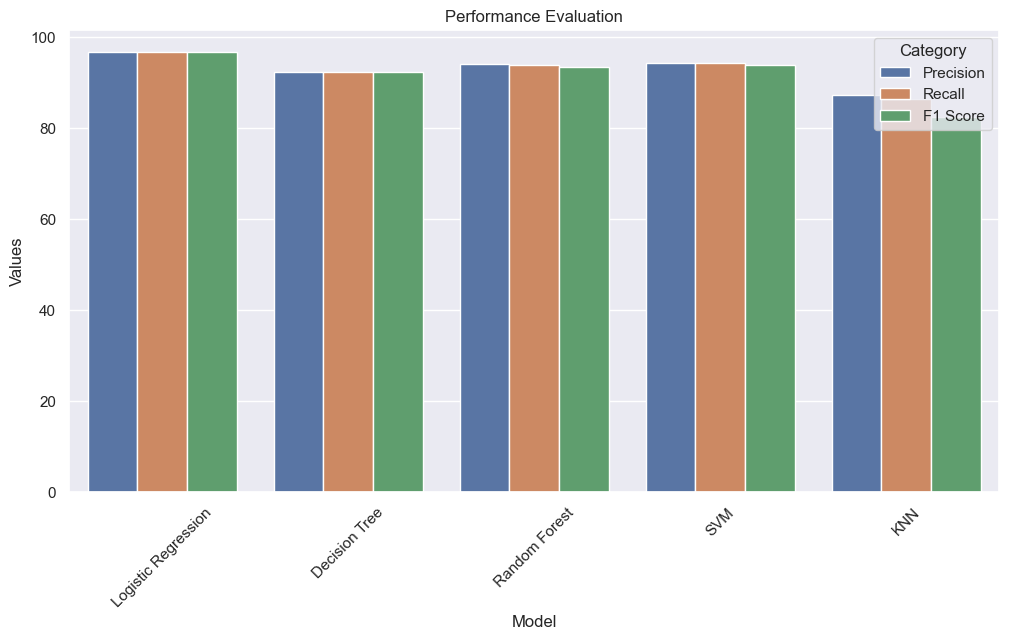

In [71]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()